# Exploratory Sales Data Analysis in Python 

<img src="https://www.activecampaign.com/wp-content/uploads/2021/10/trunzixjy_reportuppositivesales.png"/>

## Introduction
Businesses must grasp the intricacies of their sales data. In this study, we will conduct thorough exploratory data analysis (EDA) to unearth vital insights from this dataset. Our objective is to reveal hidden knowledge that can enhance profitability and decision-making for businesses. Utilizing EDA techniques, we will delve into this straightforward sales data, employing Pandas for data preprocessing and cleaning, alongside visualization tools like Matplotlib, Plotly, and Seaborn. By doing so, we aim to extract essential information that will contribute to the success of businesses.

## Importing Libraries

In [46]:
# data analysis libraries
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# other
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Data Preprocessing & Cleaning

In [54]:
# Read in data
df=pd.read_csv('/kaggle/input/sample-sales-data/sales_data_sample.csv',encoding='Latin-1')

# Show the first 5 rows of data
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [8]:
# Quick info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [9]:
# Summary statistics
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [12]:
# Check for missing values
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [13]:
# Check for duplications
df.duplicated().sum()

0

In [41]:
df.drop(['ORDERNUMBER','PRICEEACH','ORDERLINENUMBER','ORDERDATE','STATUS','QTR_ID','PRODUCTCODE','PHONE','ADDRESSLINE2','STATE',
           'POSTALCODE', 'TERRITORY', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME'], axis=1, inplace=True)

## Data Analysis & Visualization

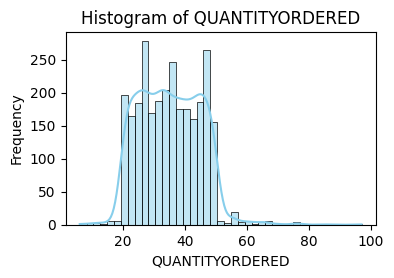

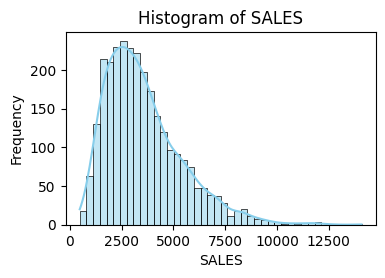

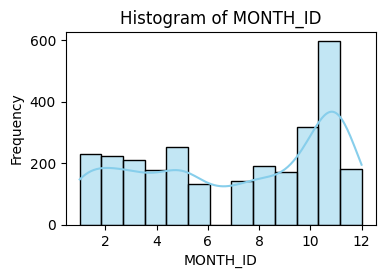

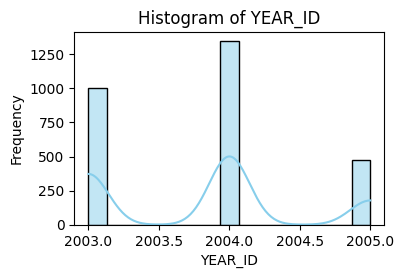

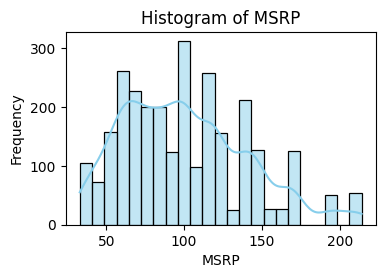

In [42]:
# Histogram of numerical features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(4, 2.5))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### Q1. Which Year Had The Most Sales?

In [44]:
# Aggregate sales by year then sort by sales
df1 = df.groupby('YEAR_ID')['SALES'].sum().reset_index()
df1_sorted = df1.sort_values(by='SALES', ascending=False)
df1_sorted

,YEAR_ID,SALES
1,2004,4724162.60
0,2003,3516979.54
2,2005,1791486.71


Text(0.5, 1.0, 'Sales vs Year')

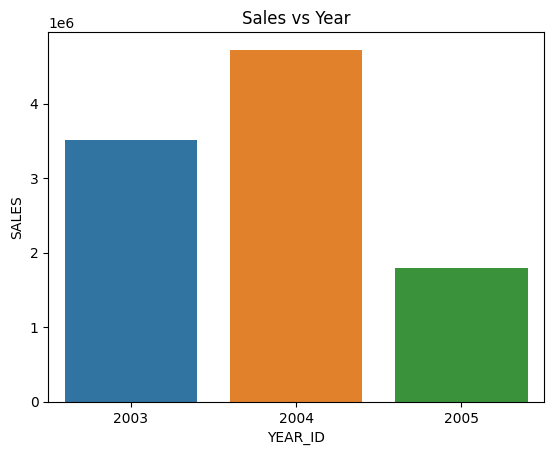

In [47]:
sns.barplot(data=df1, y='SALES', x='YEAR_ID')
plt.title('Sales vs Year')

##### This shows that, out of the three years, 2004 had the highest revenue; however, the data for 2005 is limited to five months.

### Q2. Which Month Had The Most Sales? 

In [18]:
df2 = df.groupby('MONTH_ID')['SALES'].sum().reset_index()
df2.head()

,MONTH_ID,SALES
0,1,785874.44
1,2,810441.90
2,3,754501.39
3,4,669390.96
4,5,923972.56


Text(0.5, 1.0, 'Sales vs Month')

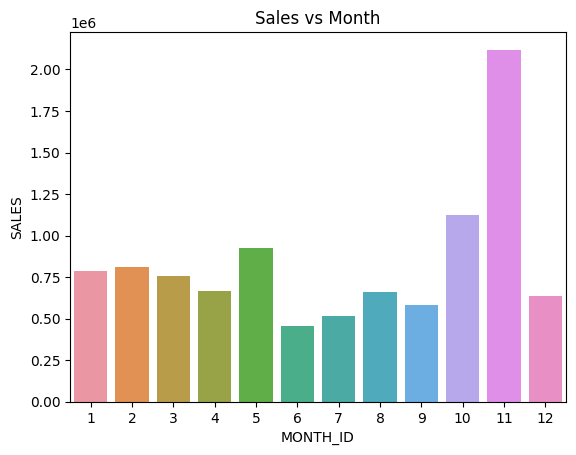

In [19]:
sns.barplot(data=df2, y='SALES', x='MONTH_ID')
plt.title('Sales vs Month')

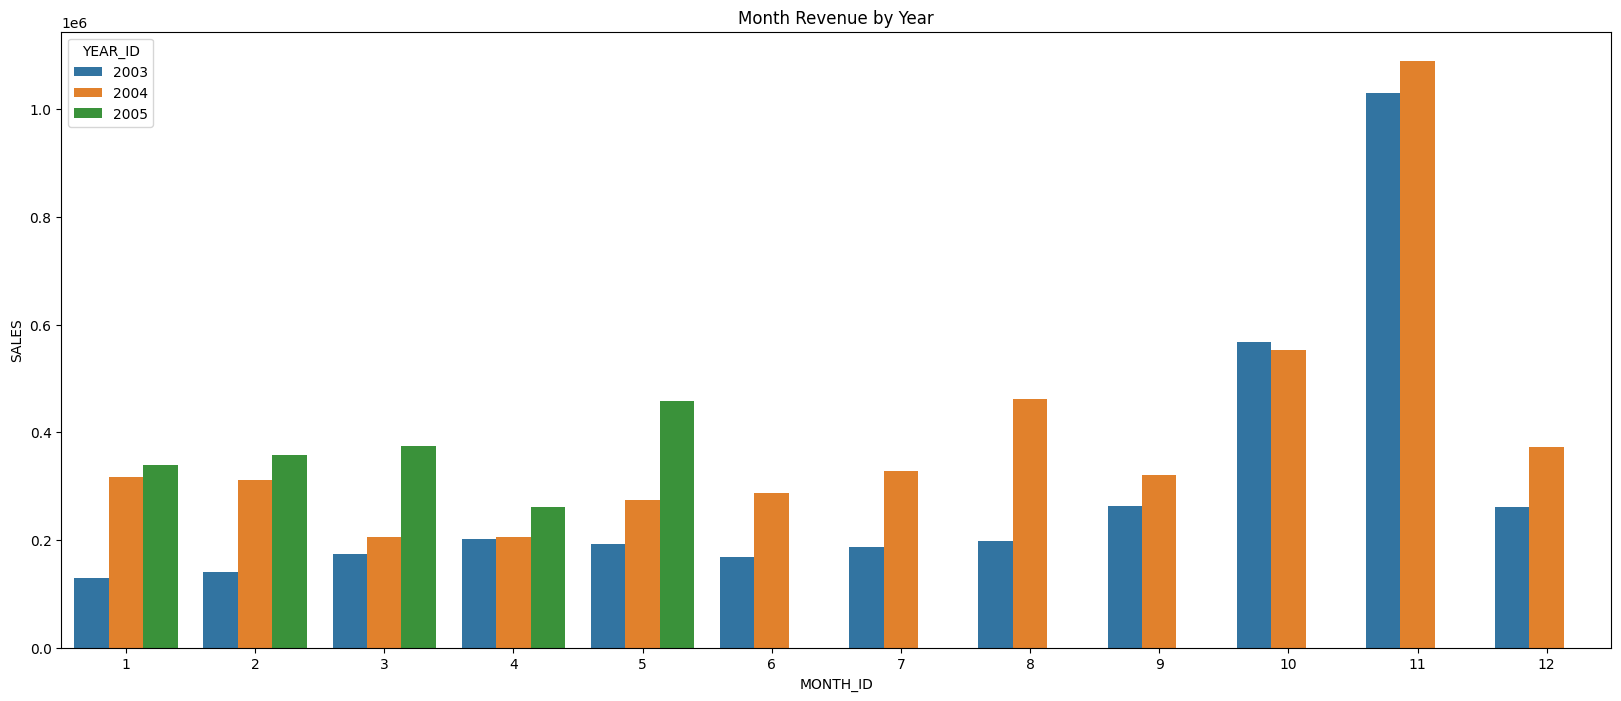

In [20]:
unique_months = df['MONTH_ID'].unique()
temp=pd.DataFrame()
# Create subplots for each year
for i, month in enumerate(unique_months):
    month_data = df[df['MONTH_ID'] == month]
    month_data=month_data.groupby('YEAR_ID')['SALES'].sum().reset_index()
    month_data['MONTH_ID'] = month
    temp = pd.concat([temp,month_data], ignore_index=True)
plt.figure(figsize=(20,8))
plt.title("Month Revenue by Year") # add title 
a= sns.barplot(x='MONTH_ID',y='SALES',data=temp,hue='YEAR_ID')
plt.xticks()
plt.show()

##### November was the month with the highest revenue. We also observe that the revenue was rising annually in this case. Compared to 2004, revenue increased in the first five months of 2005. Thus, if we had enough information, we could conclude that 2005 was likely the year with the highest revenue.

### Q3. Which Country Had The Most Sales? 

In [48]:
# Group by country and sum up the sales
country_sales = df.groupby('COUNTRY')['SALES'].sum().reset_index()

# Find the country with the most sales
most_sales_country = country_sales.loc[country_sales['SALES'].idxmax()]

print("Country with the most sales:", most_sales_country['COUNTRY'])


Country with the most sales: USA


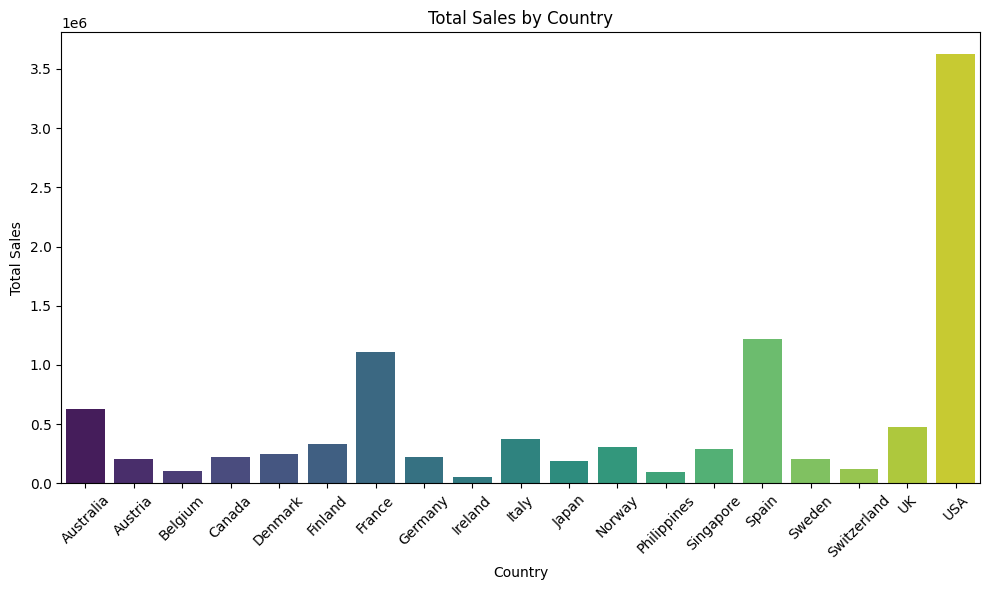

In [49]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='COUNTRY', y='SALES', data=country_sales, palette='viridis')
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Q4. Which Country Had More Sales Growth?

In [51]:
# Convert 'YEAR_ID' to datetime
df['YEAR'] = pd.to_datetime(df['YEAR_ID'])

# Group by country and year, and sum up the sales
country_year_sales = df.groupby(['COUNTRY', 'YEAR'])['SALES'].sum().reset_index()

# Calculate sales growth percentage for each country
country_sales_growth = country_year_sales.pivot_table(index='COUNTRY', columns='YEAR', values='SALES').pct_change(axis=1) * 100

# Find the country with the highest average sales growth
country_sales_growth['Mean Growth'] = country_sales_growth.mean(axis=1)
most_sales_growth_country = country_sales_growth['Mean Growth'].idxmax()

print("Country with the most sales growth:", most_sales_growth_country)


Country with the most sales growth: Belgium


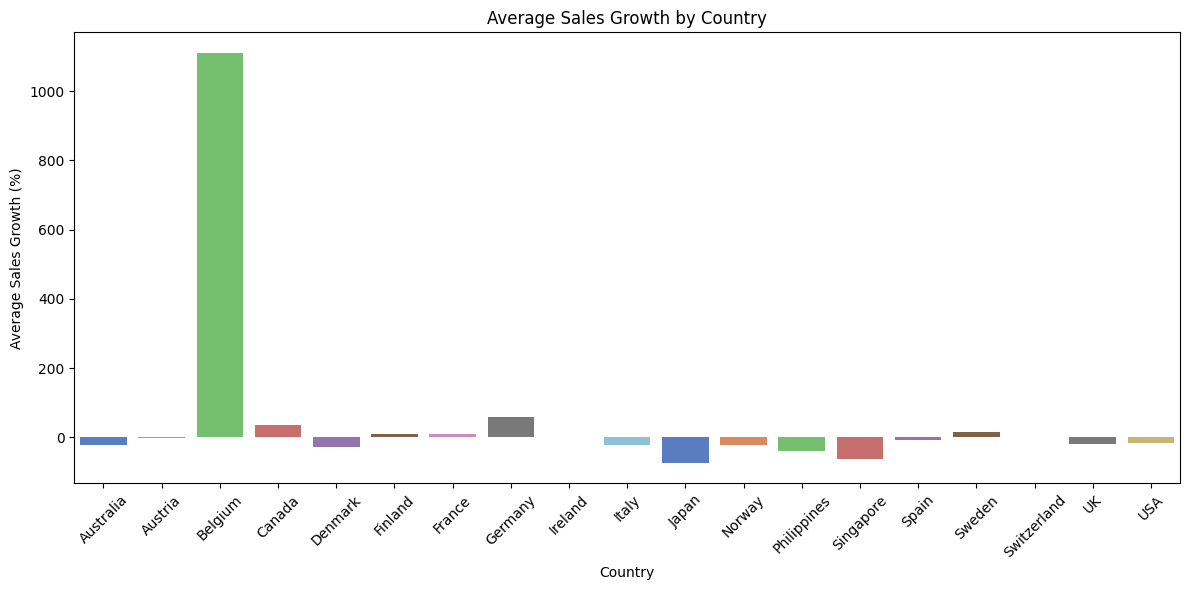

In [52]:
# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=country_sales_growth.index, y='Mean Growth', data=country_sales_growth, palette='muted')
plt.title('Average Sales Growth by Country')
plt.xlabel('Country')
plt.ylabel('Average Sales Growth (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Belgium had the most sales growth among others.

### Q5. Which Item Had Sold The Most each year?

In [56]:
# Filter data for years 2003, 2004, and 2005
years = [2003, 2004, 2005]
df_years = df[df['YEAR_ID'].isin(years)]

# Group by year and product code, and sum up the sales
yearly_product_sales = df_years.groupby(['YEAR_ID', 'PRODUCTLINE'])['QUANTITYORDERED'].sum().reset_index()

# Find the product with the most sales for each year
most_sold_per_year = yearly_product_sales.loc[yearly_product_sales.groupby('YEAR_ID')['QUANTITYORDERED'].idxmax()]

print("Most sold item per year:")
print(most_sold_per_year[['YEAR_ID', 'PRODUCTLINE', 'QUANTITYORDERED']])

Most sold item per year:
    YEAR_ID   PRODUCTLINE  QUANTITYORDERED
0      2003  Classic Cars            12473
7      2004  Classic Cars            15418
14     2005  Classic Cars             6101


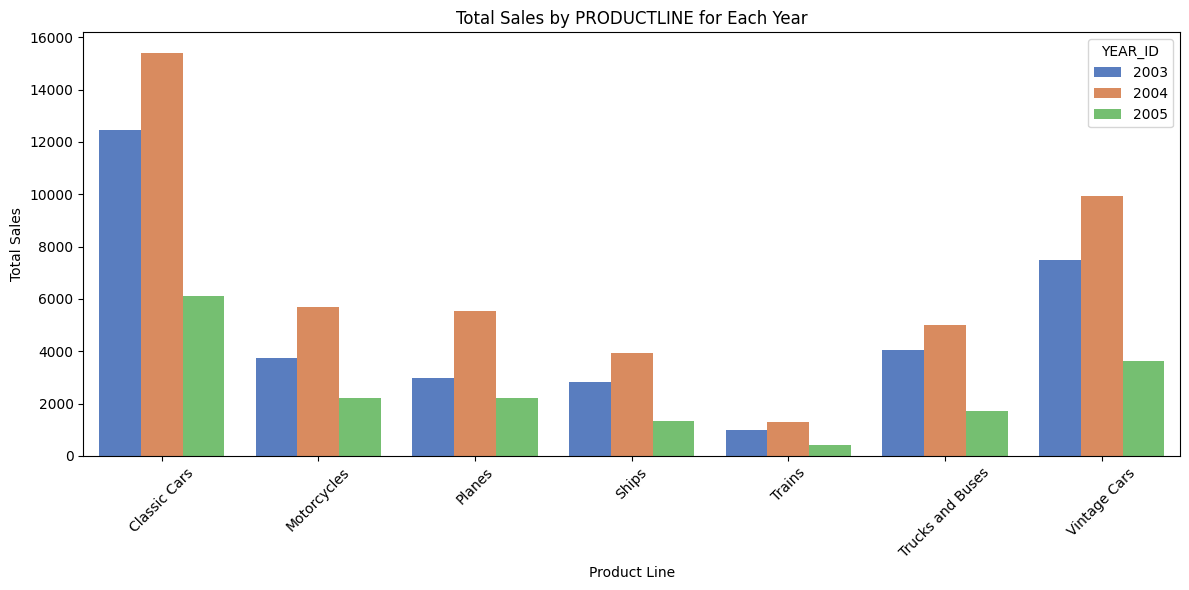

In [59]:
# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='PRODUCTLINE', y='QUANTITYORDERED', hue='YEAR_ID', data=yearly_product_sales, palette='muted')
plt.title('Total Sales by PRODUCTLINE for Each Year')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Q6. Who are the top 20% Customer? <a class="anchor" id="q7"></a>

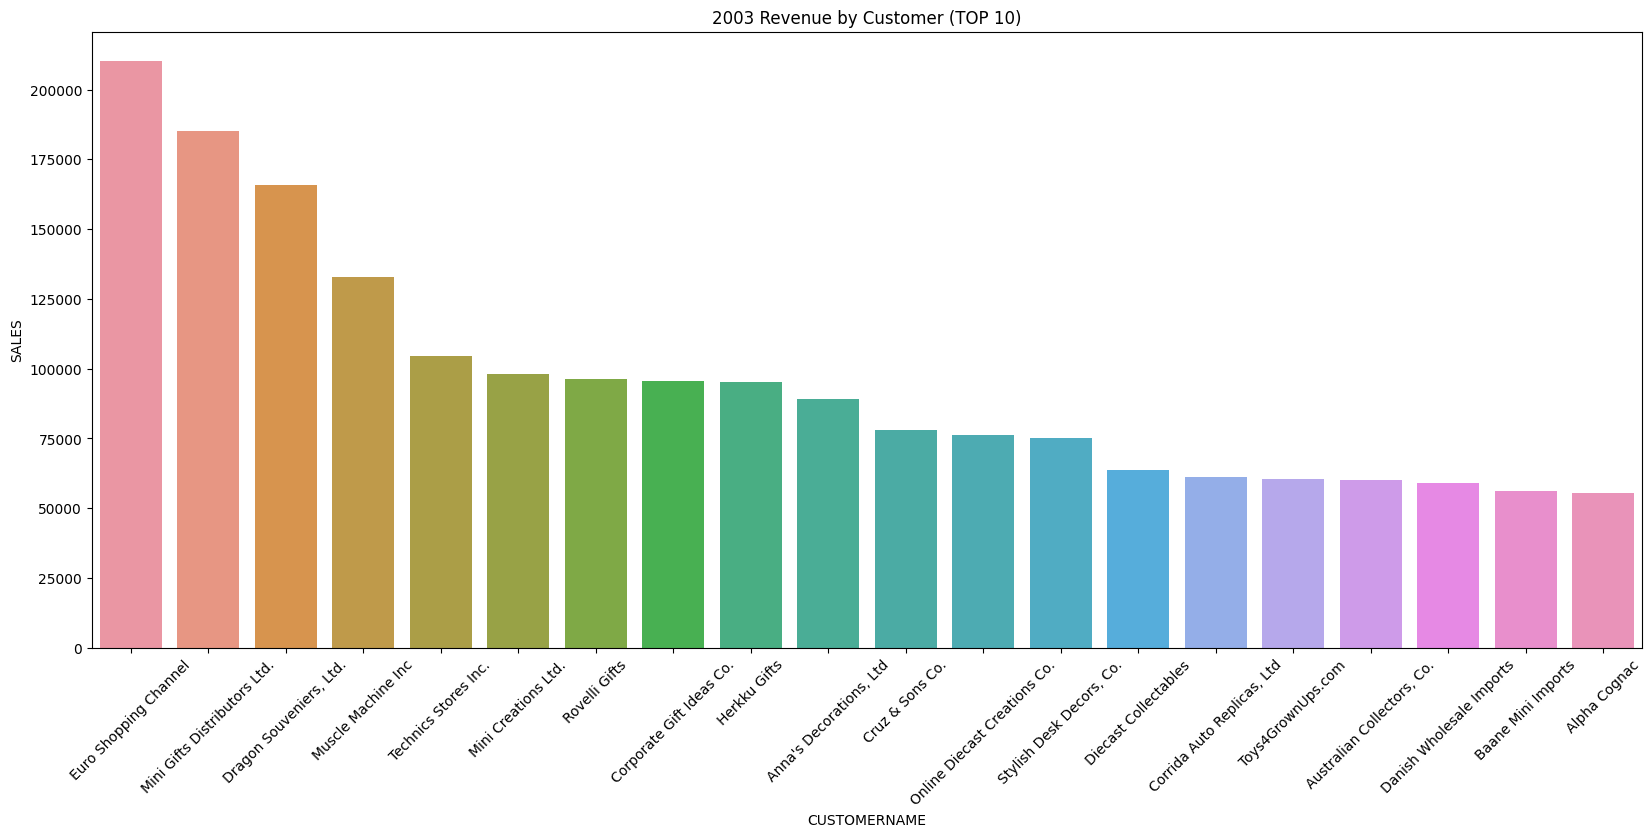

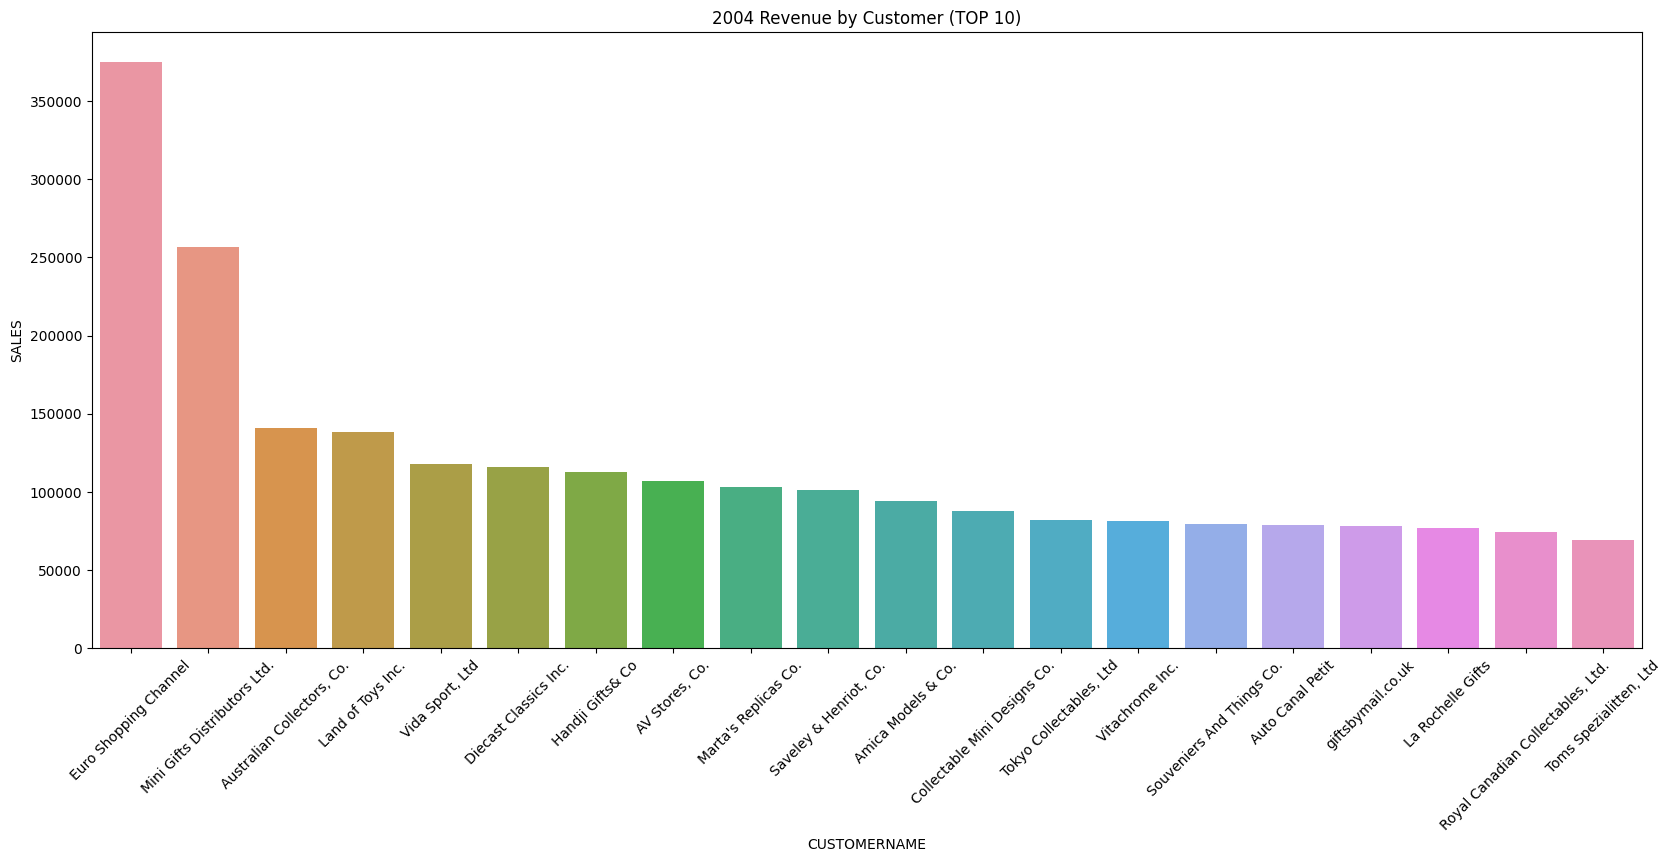

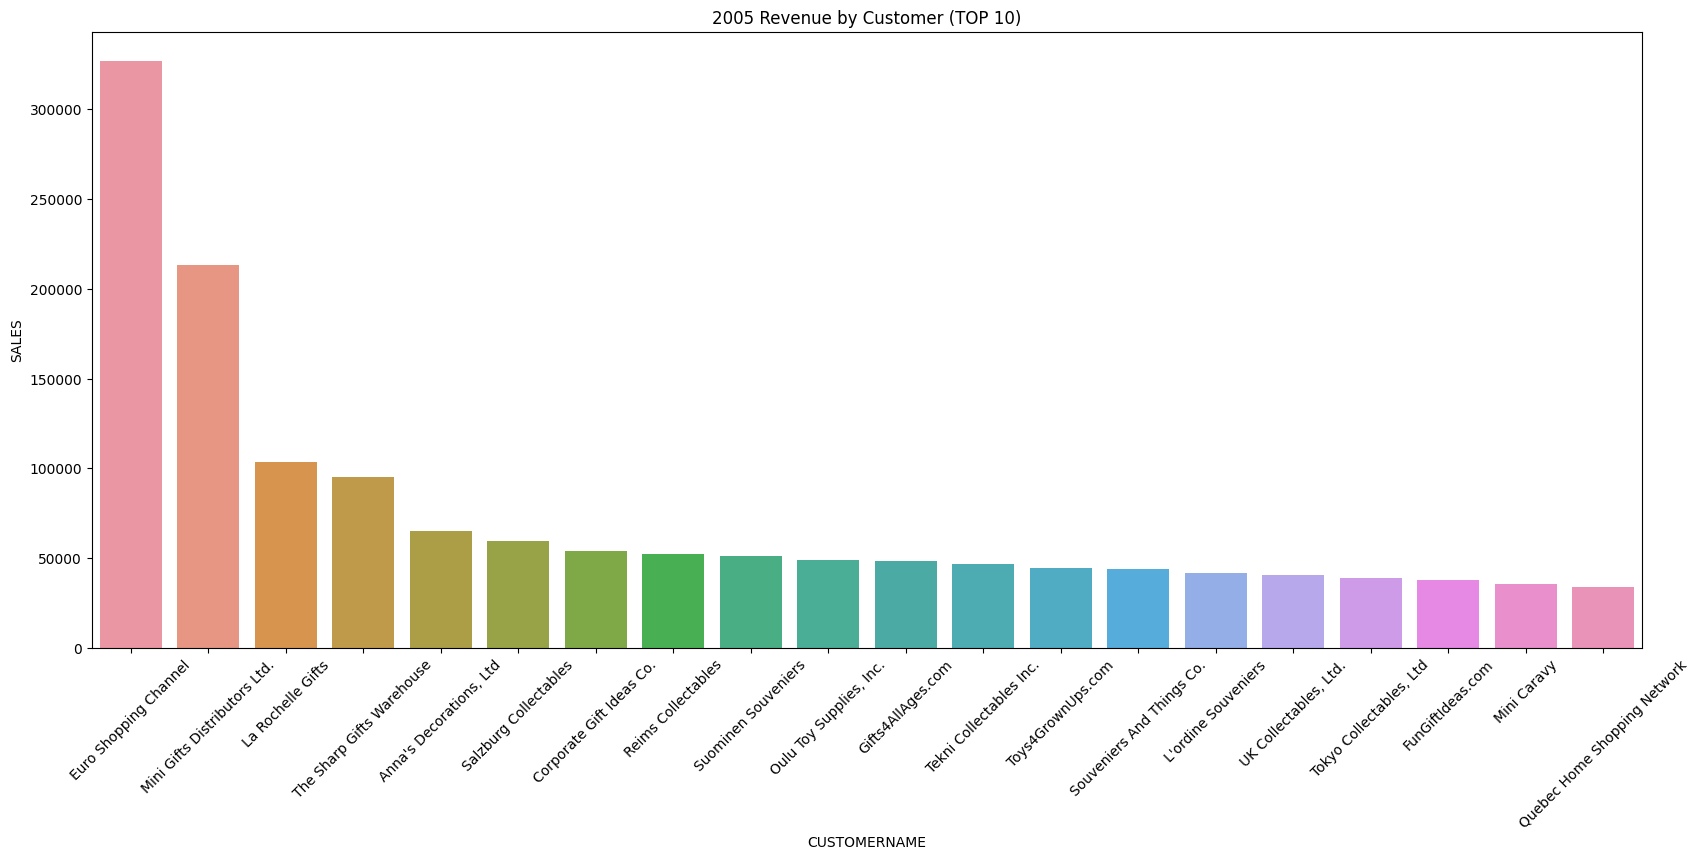

In [32]:
unique_years = df['YEAR_ID'].unique()
# Create subplots for each year
for i, year in enumerate(unique_years):
    year_data = df[df['YEAR_ID'] == year]
    year_data=year_data.groupby('CUSTOMERNAME')['SALES'].sum().reset_index()
    year_data['YEAR_ID'] = year
    plt.figure(figsize=(20,8))
    plt.title(str(year)+" Revenue by Customer (TOP 10)") # add title 
    year_data =year_data.sort_values(by = "SALES", ascending=False)
    year_data=year_data.head(20)
    a= sns.barplot(x='CUSTOMERNAME',y='SALES',data=year_data,errorbar=None)
    plt.xticks(rotation = 45)
    plt.show()

### Q7. Which Amount of Revenue is Contributed by The Top 20% of Customers? <a class="anchor" id="q8"></a>

In [34]:
unique_years = df['YEAR_ID'].unique()
temp2003=pd.DataFrame()
temp2004=pd.DataFrame()
temp2005=pd.DataFrame()
# Create subplots for each year
for i, year in enumerate(unique_years):
    year_data = df[df['YEAR_ID'] == year]
    year_data=year_data.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False).reset_index()
    year_data['YEAR_ID'] = year
    if(year == 2003):
        temp2003 = year_data
    elif(year == 2004):
        temp2004 = year_data
    else:
        temp2005 = year_data
label = ['Top 20%', 'Others']

In [35]:
temp2003['revenue_cum'] = temp2003['SALES'].cumsum()
temp2003['%revenue_cum'] = temp2003['revenue_cum']/temp2003['SALES'].sum()
n=int(0.20*len(temp2003.index))
temp2003.head(n)

,CUSTOMERNAME,SALES,YEAR_ID,revenue_cum,%revenue_cum
0,Euro Shopping Channel,210227.58,2003,210227.58,0.059775
1,Mini Gifts Distributors Ltd.,185128.12,2003,395355.70,0.112413
2,"Dragon Souveniers, Ltd.",165686.20,2003,561041.90,0.159524
3,Muscle Machine Inc,132778.24,2003,693820.14,0.197277
4,Technics Stores Inc.,104337.30,2003,798157.44,0.226944
5,Mini Creations Ltd.,97929.83,2003,896087.27,0.254789
6,Rovelli Gifts,96259.03,2003,992346.30,0.282159
7,Corporate Gift Ideas Co.,95678.88,2003,1088025.18,0.309364
8,Herkku Gifts,95277.18,2003,1183302.36,0.336454
9,"Anna's Decorations, Ltd",88983.71,2003,1272286.07,0.361755


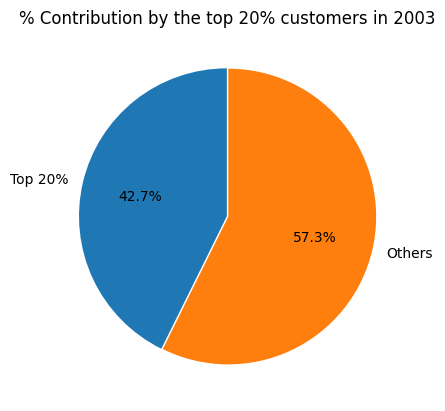

In [36]:
data = [(temp2003.head(n)['%revenue_cum'].max())*100, (1-temp2003.head(n)['%revenue_cum'].max())*100]
#fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=label, autopct='%1.1f%%', explode=(0, 0.01), startangle=90)
plt.title('% Contribution by the top 20% customers in 2003')
plt.show()

In [37]:
temp2004['revenue_cum'] = temp2004['SALES'].cumsum()
temp2004['%revenue_cum'] = temp2004['revenue_cum']/temp2004['SALES'].sum()
n=int(0.20*len(temp2004.index))
temp2004.head(n)

,CUSTOMERNAME,SALES,YEAR_ID,revenue_cum,%revenue_cum
0,Euro Shopping Channel,375268.36,2004,375268.36,0.079436
1,Mini Gifts Distributors Ltd.,256474.26,2004,631742.62,0.133726
2,"Australian Collectors, Co.",140859.57,2004,772602.19,0.163543
3,Land of Toys Inc.,138285.68,2004,910887.87,0.192815
4,"Vida Sport, Ltd",117713.56,2004,1028601.43,0.217732
5,Diecast Classics Inc.,115971.34,2004,1144572.77,0.242281
6,Handji Gifts& Co,112911.15,2004,1257483.92,0.266181
7,"AV Stores, Co.",106789.89,2004,1364273.81,0.288786
8,Marta's Replicas Co.,103080.38,2004,1467354.19,0.310606
9,"Saveley & Henriot, Co.",101339.14,2004,1568693.33,0.332057


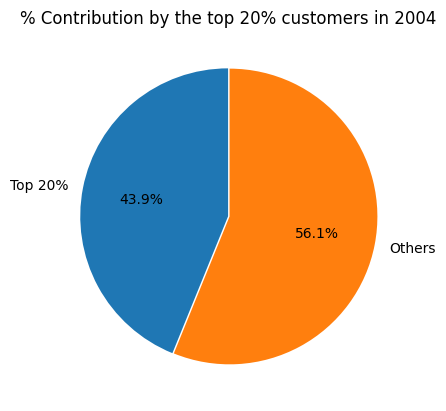

In [38]:
data = [(temp2004.head(n)['%revenue_cum'].max())*100, (1-temp2004.head(n)['%revenue_cum'].max())*100]
#fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=label, autopct='%1.1f%%', explode=(0, 0.01), startangle=90)
plt.title('% Contribution by the top 20% customers in 2004')
plt.show()

In [39]:
temp2005['revenue_cum'] = temp2005['SALES'].cumsum()
temp2005['%revenue_cum'] = temp2005['revenue_cum']/temp2005['SALES'].sum()
n=int(0.20*len(temp2005.index))
temp2005.head(n)

,CUSTOMERNAME,SALES,YEAR_ID,revenue_cum,%revenue_cum
0,Euro Shopping Channel,326798.17,2005,326798.17,0.182417
1,Mini Gifts Distributors Ltd.,213255.68,2005,540053.85,0.301456
2,La Rochelle Gifts,103402.09,2005,643455.94,0.359174
3,The Sharp Gifts Warehouse,95409.93,2005,738865.87,0.412432
4,"Anna's Decorations, Ltd",65012.42,2005,803878.29,0.448721
5,Salzburg Collectables,59475.10,2005,863353.39,0.481920
6,Corporate Gift Ideas Co.,54203.62,2005,917557.01,0.512176
7,Reims Collectables,52029.07,2005,969586.08,0.541219


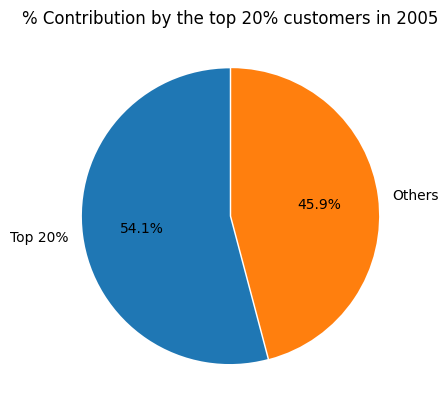

In [40]:
data = [(temp2005.head(n)['%revenue_cum'].max())*100, (1-temp2005.head(n)['%revenue_cum'].max())*100]
#fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=label, autopct='%1.1f%%', explode=(0, 0.01), startangle=90)
plt.title('% Contribution by the top 20% customers in 2005')
plt.show()